# Files necessay to run:

- `PhotoReceptorData.pkl` contains the data describing the photoisomerization rates of the photoreceptors
- `IlluminationDataMEA2.pkl` contains the data describing the illumination of the LEDs
- `cal_with_MEA2_matias.pkl` contains the data describing the (human) white LED and other parameters for voltages computation

In [1]:
# prevents warnings from being printed only in this cell
import warnings
warnings.filterwarnings("ignore")
import pickle

from matplotlib.pyplot import *
from scipy import interpolate

%pylab inline
warnings.filterwarnings("default")

from isomerization_lib import *

%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Load Opsin data

In [2]:
fsave = './PhotoReceptorData'
PhData = load_obj(fsave)                        # Photo Receptors Data

Opsins=[]                                       # Opsins matrix initialization

Opsins.append(PhData['Scones'])                 # S cones
Opsins.append(PhData['Mela'])                   # Melanopsin
Opsins.append(PhData['Rods'])                   # Rods
Opsins.append(PhData['Mcones'])                 # M cones
Opsins.append(PhData['RedOpsin'])               # Red Opsin

x = PhData['x_axis']                            # Wavelength axis

# Creating a dictionary with indexes for each opsin
OpsinIndex = {'S-cone':0,'Melano':1,'Rhodo':2,'M-cone':3,'Redo':4}


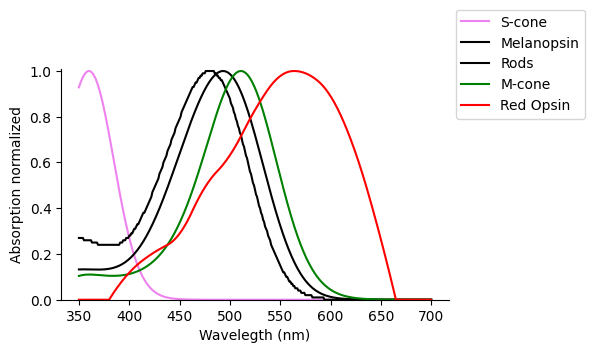

In [3]:
fig, ax = plt.subplots(figsize=(5, 3))

#plot each opsin

ax.plot(x,Opsins[0], color='violet') # S cones
ax.plot(x,Opsins[1], color='black') # Melanopsin
ax.plot(x,Opsins[2], color='black')  # Rods
ax.plot(x,Opsins[3], color='green')  # M cones
ax.plot(x,Opsins[4], color='red')    # Red Opsin


ax.set_xlabel('Wavelegth (nm)')    
ax.set_ylabel('Absorption normalized')

ax.set_ylim(0,1.01)

# move legend out of the plot
ax.legend(['S-cone','Melanopsin','Rods','M-cone','Red Opsin'], loc='center left',
            bbox_to_anchor=(1, 1.02))


# remove upper and right frame's lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Load LEDs illumination Data

In [4]:
fsave = './IlluminationDataMEA2'
IData = load_obj(fsave)                                     # Illumination Data Load

LEDs =[]                                                    # LEDs matrix initialization                                
LEDs.append(IData['Violet'])                                # Violet        
LEDs.append(IData['Blue'])                                  # Blue
LEDs.append(IData['Green'])                                 # Green
LEDs.append(IData['Yellow'])                                # Yellow
LEDs.append(IData['Red'])                                   # Red

x = IData['x_axis']                                         # Wavelength axis

# Power meter correction factor from 09/09/22
correction_f = 1                                        

LEDs=np.array(LEDs)/correction_f                            # Correction

In [5]:

# To fix the value of power for the red LED
# You take the value measured and multiply it like below (before you divide by the area under the curve)

USE_CUSTOM_MEASURED_POWER = True

if USE_CUSTOM_MEASURED_POWER: # THIS WAS MEASURED ON 25/01/2024 BY AWEN AND FILIPPO.
    newred = 3918
    LEDs[4]  = LEDs[4]/(np.sum(LEDs[4]/2))*newred

    newyellow = 498
    LEDs[3]  = LEDs[3]/(np.sum(LEDs[3]/2))*newyellow

    newgreen = 330
    LEDs[2]  = LEDs[2]/(np.sum(LEDs[2]/2))*newgreen

    newblue = 443
    LEDs[1]  = LEDs[1]/(np.sum(LEDs[1]/2))*newblue

    newviolet = 607
    LEDs[0]  = LEDs[0]/(np.sum(LEDs[0]/2))*newviolet


Text(0, 0.5, 'Power (µW/cm²)')

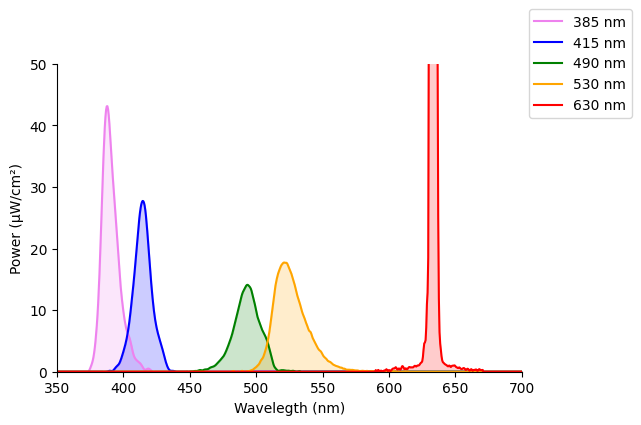

In [6]:
fig , ax = plt.subplots(figsize=(6, 4))


ax.plot(x,LEDs[0], 'violet')
ax.plot(x,LEDs[1], 'blue')
ax.plot(x,LEDs[2], 'green')
ax.plot(x,LEDs[3], 'orange')
ax.plot(x,LEDs[4], 'red')

# fill under curves

ax.fill_between(x,LEDs[0],color='violet',alpha=0.2)
ax.fill_between(x,LEDs[1],color='blue',alpha=0.2)
ax.fill_between(x,LEDs[2],color='green',alpha=0.2)
ax.fill_between(x,LEDs[3],color='orange',alpha=0.2)
ax.fill_between(x,LEDs[4],color='red',alpha=0.2)

# remove upper and right frame's lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(['385 nm','415 nm','490 nm','530 nm','630 nm'], loc='center left',
            bbox_to_anchor=(1, 1),
            fontsize=10)

ax.set_ylim([0,50])
ax.set_xlim([350,700])
ax.set_xlabel('Wavelegth (nm)')
ax.set_ylabel('Power (µW/cm²)')


In [7]:
for i in np.arange(5):
    print(i,np.sum(LEDs[i])/2)

0 607.0
1 443.0
2 329.9999999999999
3 497.99999999999994
4 3918.0


# Calculate Isomerizations

## Compute Isomerization for all opsins for all LEDs sources

In [8]:
print ('\n')
print ('-----------------------------')
print ('EFFECTS FROM VIOLET LED')

# Get effect from Violet
VIOLET_ISO_result = IlluminanceFactor(LEDs[0],Opsins,x)
print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(VIOLET_ISO_result,F=0)

# -----------------------------------------------------------------------------------------------

print ('\n')
print ('-----------------------------')
print ('EFFECTS FROM BLUE LED')

# Get effect from Blue
BLUE_ISO_result = IlluminanceFactor(LEDs[1],Opsins,x)
print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(BLUE_ISO_result,F=0)

# -----------------------------------------------------------------------------------------------

print ('\n')
print ('-----------------------------')
print ('EFFECTS FROM GREEN LED')

# Get effect from Green
GREEN_ISO_result = IlluminanceFactor(LEDs[2],Opsins,x)
print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(GREEN_ISO_result,F=0)

# -----------------------------------------------------------------------------------------------

print ('\n')
print ('-----------------------------')
print ('EFFECTS FROM YELLOW LED')

# Get effect from Yellow
YELLOW_ISO_result = IlluminanceFactor(LEDs[3],Opsins,x)
print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(YELLOW_ISO_result,F=0)

# -----------------------------------------------------------------------------------------------

print ('\n')
print ('-----------------------------')
print ('EFFECTS FROM RED LED')

# Get effect from RED
RED_ISO_result = IlluminanceFactor(LEDs[4],Opsins,x)
print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(RED_ISO_result,F=0)

print ('\n')




-----------------------------
EFFECTS FROM VIOLET LED
Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :    1122488
Melanopsin  :     605127
Rhodopsin   :     923038
Mcones      :     256293
Red_opsin   :     161250


-----------------------------
EFFECTS FROM BLUE LED
Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :     192180
Melanopsin  :     714061
Rhodopsin   :    1225453
Mcones      :     261026
Red_opsin   :     322336


-----------------------------
EFFECTS FROM GREEN LED
Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :         67
Melanopsin  :    1500166
Rhodopsin   :    3975252
Mcones      :    1420873
Red_opsin   :     971353


-----------------------------
EFFECTS FROM YELLOW LED
Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :          3
Melanopsin  :    1224575
Rhodopsin   :    4485901
Mcones      :    2276391
Red_

In [9]:
# Get effect from All together

ISO_result = IlluminanceFactor(np.sum(LEDs[0:4],axis=0),Opsins,x)

print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(ISO_result,F=0)
print('')
Write_fancy(ISO_result,F='scientific')


Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :    1314738
Melanopsin  :    4043929
Rhodopsin   :   10609645
Mcones      :    4214583
Red_opsin   :    3656619

Scones      : 1.31e+06
Melanopsin  : 4.04e+06
Rhodopsin   : 1.06e+07
Mcones      : 4.21e+06
Red_opsin   : 3.66e+06


In [10]:
OpsinIndex

{'S-cone': 0, 'Melano': 1, 'Rhodo': 2, 'M-cone': 3, 'Redo': 4}

## Computations

In [11]:
# Filippo
#----------------------------------------
violet = 0
blue   = 0 
green = 0
yellow = 0
red    = 0.6


my_light = LEDs[0]*violet + LEDs[1]*blue + LEDs[2]*green + LEDs[3]*yellow + LEDs[4]*red


In [12]:
NDfilter = 0
Transmission =  10**(-NDfilter/10)

LIGHT = (violet*LEDs[0]+blue*LEDs[1]+green*LEDs[2]+yellow*LEDs[3]+red*LEDs[4])*Transmission

ISO_result = IlluminanceFactor(LIGHT,Opsins,x)

print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(ISO_result,F=0)

Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :          0
Melanopsin  :         20
Rhodopsin   :      29690
Mcones      :      60238
Red_opsin   :    7951389


In [13]:
# Load LED data
file_cal = "cal_with_MEA2_matias.pkl"
caldata =load_obj(file_cal)
print(caldata.keys())

dict_keys(['V', 'Vcurves', 'xnew', 'LedSpectra', 'orderV', 'orderS', 'whiteP'])


In [14]:
caldata['orderV']
 

['r', 'y', 'g', 'b', 'violet']

In [15]:
lx = caldata['xnew']
lx[0] = 300

color_order = caldata['orderS']
spec_curves = np.array(caldata['LedSpectra'])
spec_curves[:,0]=0

reorder = [1,2,3,4,5]
Vcurves = np.array(caldata['Vcurves'])[:,reorder]

In [16]:
# New interpolated V calibration curves
#---------------------------------------------

Vnew = np.linspace(0,5,5001)
newVcurves = np.zeros([5,5001])
for i in np.arange(5):
    vals = (np. isnan(Vcurves[:,i]))==False
    f = interpolate.interp1d(caldata['V'][vals],Vcurves[:,i][vals],fill_value="extrapolate")
    newVcurves[i] = f(Vnew) / correction_f  # use interpolation function returned by `interp1d`
    newVcurves[i] = np.where(newVcurves[i]<0,0,newVcurves[i]) # take negative extrapolations out


Rmax = np.nanmax(newVcurves[0])
Ymax = np.nanmax(newVcurves[1])
Gmax = np.nanmax(newVcurves[2])
Bmax = np.nanmax(newVcurves[3])
Vmax = np.nanmax(newVcurves[4])

In [17]:
# 1/violet,1/green,Transmission
#Print voltages
print('\nVoltages')
print('redV   ',find_V(red,'r', newVcurves, Vnew),' V')
print('yellowV',find_V(yellow,'y', newVcurves, Vnew),' V')
print('greenV ',find_V(green,'g', newVcurves, Vnew),' V')
print('blueV  ',find_V(blue,'b', newVcurves, Vnew),' V')
print('violetV',find_V(violet,'v', newVcurves, Vnew),' V')


Voltages
The index is: 2360
redV    2.36  V
The index is: 0
yellowV 0.0  V
The index is: 0
greenV  0.0  V
The index is: 0
blueV   0.0  V
The index is: 0
violetV 0.0  V


In [18]:
 # color
 # 0: red
 # 1: yellow
 # 2: green
 # 3: blue
 # 4: violet

color = 4

#Print normalized intensities
print('\nNormalized intensities')
find_value(find_V(red,'r', newVcurves, Vnew), 0, newVcurves, Vnew)


Normalized intensities
The index is: 2360
The index is: 2360
The desired voltage is: 2.36
The voltage found is: 2.36
The result is: 0.6


0.6

In [19]:
# Experimental voltages for the LEDs

# During the experiment of 10 Jan 2024, the following voltages were used to activate the LEDs 

# 1. Yellow:  1.907     V
# 2. Violet:  0.02      V
# 3. Violet:  0.04      V
# 4. Violet:  0.16      V
# 5. Violet:  0.32      V
# 6. Violet:  0.64      V
# 7. Violet:  1.20      V

# Therefore, the following intensities were used

print('\nExperimental intensities')

print('Yellow: (1.907 V) ')
result = find_value(1.907, 1, newVcurves, Vnew)
LIGHT = result*LEDs[3]
ISO_result = IlluminanceFactor(LIGHT,Opsins,x)
print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(ISO_result,F=0)
print('\n')

print('Yellow: (3.5 V) ')
result = find_value(3.5, 1, newVcurves, Vnew)
LIGHT = result*LEDs[3]
ISO_result = IlluminanceFactor(LIGHT,Opsins,x)
print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(ISO_result,F=0)
print('\n')

print('Yellow: (5.0 V) ')
result = find_value(5, 1, newVcurves, Vnew)
LIGHT = result*LEDs[3]
ISO_result = IlluminanceFactor(LIGHT,Opsins,x)
print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(ISO_result,F=0)
print('\n')

print('Violet: (0.02 V) ')
result = find_value(0.02, 4, newVcurves, Vnew)
LIGHT = result*LEDs[0]
ISO_result = IlluminanceFactor(LIGHT,Opsins,x)
print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(ISO_result,F=0)
print('\n')

print('Violet: (0.04 V) ')
result = find_value(0.04, 4, newVcurves, Vnew)
LIGHT = result*LEDs[0]
ISO_result = IlluminanceFactor(LIGHT,Opsins,x)
print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(ISO_result,F=0)
print('\n')

print('Violet: (0.16 V) ')
result = find_value(0.16, 4, newVcurves, Vnew)
LIGHT = result*LEDs[0]
ISO_result = IlluminanceFactor(LIGHT,Opsins,x)
print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(ISO_result,F=0)
print('\n')

print('Violet: (0.32 V) ')
result = find_value(0.32, 4, newVcurves, Vnew)
LIGHT = result*LEDs[0]
ISO_result = IlluminanceFactor(LIGHT,Opsins,x)
print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(ISO_result,F=0)
print('\n')

print('Violet: (0.64 V) ')
result = find_value(0.64, 4, newVcurves, Vnew)
LIGHT = result*LEDs[0]
ISO_result = IlluminanceFactor(LIGHT,Opsins,x)
print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(ISO_result,F=0)
print('\n')

print('Violet: (1.20 V) ')
result = find_value(1.20, 4, newVcurves, Vnew)
LIGHT = result*LEDs[0]
ISO_result = IlluminanceFactor(LIGHT,Opsins,x)
print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(ISO_result,F=0)


Experimental intensities
Yellow: (1.907 V) 
The index is: 1907
The desired voltage is: 1.907
The voltage found is: 1.907
The result is: 0.5582383838383838
Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :          2
Melanopsin  :     683605
Rhodopsin   :    2504202
Mcones      :    1270769
Red_opsin   :    1229062


Yellow: (3.5 V) 
The index is: 3500
The desired voltage is: 3.5
The voltage found is: 3.5
The result is: 0.8222222222222222
Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :          2
Melanopsin  :    1006873
Rhodopsin   :    3688408
Mcones      :    1871699
Red_opsin   :    1810270


Yellow: (5.0 V) 
The index is: 5000
The desired voltage is: 5
The voltage found is: 5.0
The result is: 1.0
Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :          3
Melanopsin  :    1224575
Rhodopsin   :    4485901
Mcones      :    2276391
Red_opsin   :    2201680


Violet:

Experimental intensities

    Yellow: (1.907 V) 
    The index is: 1907
    The desired voltage is: 1.907
    The voltage found is: 1.907
    The result is: 0.5582383838383838
    Results are in: Isomerisations/s - For R* value look for Rhodopsin result

    Scones      :          2
    Melanopsin  :     683605
    Rhodopsin   :    2504202
    Mcones      :    1270769
    Red_opsin   :    1229062


    Yellow: (3.5 V) 
    The index is: 3500
    The desired voltage is: 3.5
    The voltage found is: 3.5
    The result is: 0.8222222222222222
    Results are in: Isomerisations/s - For R* value look for Rhodopsin result

    Scones      :          2
    Melanopsin  :    1006873
    Rhodopsin   :    3688408
    Mcones      :    1871699
    Red_opsin   :    1810270


    Yellow: (5.0 V) 
    The index is: 5000
    The desired voltage is: 5
    The voltage found is: 5.0
    The result is: 1.0
    Results are in: Isomerisations/s - For R* value look for Rhodopsin result

    Scones      :          3
    Melanopsin  :    1224575
    Rhodopsin   :    4485901
    Mcones      :    2276391
    Red_opsin   :    2201680

    Violet: (0.02 V) 
    The index is: 20
    The desired voltage is: 0.02
    The voltage found is: 0.02
    The result is: 0.0
    Results are in: Isomerisations/s - For R* value look for Rhodopsin result
    Scones      :          0
    Melanopsin  :          0
    Rhodopsin   :          0
    Mcones      :          0
    Red_opsin   :          0


    Violet: (0.04 V) 
    The index is: 40
    The desired voltage is: 0.04
    The voltage found is: 0.04
    The result is: 0.0015968063872255488
    Results are in: Isomerisations/s - For R* value look for Rhodopsin result
    Scones      :       1840
    Melanopsin  :        992
    Rhodopsin   :       1513
    Mcones      :        420
    Red_opsin   :        264


    Violet: (0.16 V) 
    The index is: 160
    The desired voltage is: 0.16
    The voltage found is: 0.16
    The result is: 0.024031936127744517
    Results are in: Isomerisations/s - For R* value look for Rhodopsin result
    Scones      :      27687
    Melanopsin  :      14926
    Rhodopsin   :      22767
    Mcones      :       6322
    Red_opsin   :       3977


    Violet: (0.32 V) 
    The index is: 320
    The desired voltage is: 0.32
    The voltage found is: 0.32
    The result is: 0.05588822355289421
    Results are in: Isomerisations/s - For R* value look for Rhodopsin result
    Scones      :      64387
    Melanopsin  :      34711
    Rhodopsin   :      52947
    Mcones      :      14701
    Red_opsin   :       9249


    Violet: (0.64 V) 
    The index is: 640
    The desired voltage is: 0.64
    The voltage found is: 0.64
    The result is: 0.12115768463073853
    Results are in: Isomerisations/s - For R* value look for Rhodopsin result
    Scones      :     139583
    Melanopsin  :      75248
    Rhodopsin   :     114781
    Mcones      :      31870
    Red_opsin   :      20052


    Violet: (1.20 V) 
    The index is: 1200
    The desired voltage is: 1.2
    The voltage found is: 1.2
    The result is: 0.23433133732534928
    Results are in: Isomerisations/s - For R* value look for Rhodopsin result
    Scones      :     269968
    Melanopsin  :     145538
    Rhodopsin   :     221998
    Mcones      :      61641
    Red_opsin   :      38782


*Table Experiment 1*

| LED       | Voltage   | Scones | Melanopsin | Rhodopsin | Mcones  | Red_opsin |
| ---       | ---       | ---    | ---        | ---       | ---     | ---       |
| Yellow    | 1.907     | 2      | 693214     | 2539402   | 1288631 | 1246338   |
| Yellow    | 5.0       | 2      | 1224575    | 4485901   | 2276391 | 2201680   |

*Table Experiment 2*

| LED       | Voltage   | Scones | Melanopsin | Rhodopsin | Mcones  | Red_opsin |
| ---       | ---       | ---    | ---        | ---       | ---     | ---       |
| Yellow    | 3.5       | 2      | 1006873    | 3688408   | 1871699 | 1810270   |
| Violet    | 0.02      | 0 | 0 | 0 | 0 | 0 |
| Violet    | 0.04      | 1840 | 992 | 1513 | 420 | 264 |
| Violet    | 0.16 | 27687 | 14926 | 22767 | 6322 | 3977 |
| Violet    | 0.32 | 64387 | 34711 | 52947 | 14701 | 9249 |
| Violet    | 0.64 | 139583 | 75248 | 114781 | 31870 | 20052 |
| Violet    | 1.2 | 269968 | 145538 | 221998 | 61641 | 38782 |

*Table Experiment 3*

| LED       | Voltage   | Scones | Melanopsin | Rhodopsin | Mcones  | Red_opsin |
| ---       | ---       | ---    | ---        | ---       | ---     | ---       |
| Yellow    | 3.5       | 2      | 1006873    | 3688408   | 1871699 | 1810270   |
| Violet | 1.2 | 269968 | 145538 | 221998 | 61641 | 38782 |
| Violet | 0.64 | 139583 | 75248 | 114781 | 31870 | 20052 |
| Violet | 0.32 | 64387 | 34711 | 52947 | 14701 | 9249 |
| Violet | 0.16 | 27687 | 14926 | 22767 | 6322 | 3977 |
| Violet | 0.04 | 1840 | 992 | 1513 | 420 | 264 |
| Violet | 0.02 | 0 | 0 | 0 | 0 | 0 |
| Violet | 1.2 | 269968 | 145538 | 221998 | 61641 | 38782 |


In [44]:
def chirp_blocks_bar_plot(chirp_blocks, ax = None, bar_width = 0.35, fontsize = 12):
        
    # Each block is composed of colors (could be one or more)
    # Each color is composed of S and M cone isomerization rates

    # Each color is represented by a bar with two colors, one for S and one for M cone isomerization rates which are stacked on top of each other
    # The height of the bar is the sum of the isomerization rates for S and M cones

    # The bars are grouped by block
    # There is one bar for each color in a block

    # The colors are ordered by the order in which they appear in the block

    # The blocks are ordered by the order in which they appear in the experiment

    for i, (block_name, block) in enumerate(chirp_blocks.items()):

        block_center = i + 1

        for j, (color_name, color) in enumerate(block.items()):
            s_c = color['s_c']
            m_c = color['m_c']

            # The bars are grouped by block
            # There is one bar for each color in a block
            len_block = len(block)
            if len_block == 1:
                offset = 1
            else:
                offset = 0
            color_center = block_center + ((j+offset) - 1/len_block) * bar_width*1.1

            # mc and sc are stacked on top of each other
            ax.bar(color_center, s_c, width=bar_width, color='violet', alpha = 1, label='Sc')
            ax.bar(color_center, m_c, width=bar_width, color='g', bottom=s_c, alpha=0.5, label='Mc')


    ax.set_xticks(np.arange(1, len(chirp_blocks) + 1))
    ax.set_xticklabels(np.arange(1, len(chirp_blocks) + 1), fontsize=fontsize)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('Chirp Block', fontsize=fontsize)

    return ax

def plot_chirp_blocks_2D_plane(chirp_blocks_experiment, ax = None, dot_color_setting = 'auto', connector_color = 'black'):
    # each block is a point in a 2D plane s_c, m_c
    # each block is numberd by the order in which it appears in the experiment

    for i, (block_name, block) in enumerate(chirp_blocks_experiment.items()):

        n_colors = len(block)

        for j, (color_name, color) in enumerate(block.items()):
            s_c = color['s_c']
            m_c = color['m_c']

            if dot_color_setting == 'auto':
                # color the dot depending on s_c and m_c
                if s_c > m_c:
                    dot_color = 'violet'
                else:
                    dot_color = 'g'
            else:
                dot_color = dot_color_setting

            ax.scatter(s_c, m_c, label=j, c=dot_color, alpha = 1)
            if n_colors > 1:
                #connect the two dots for this block
                for k in range(n_colors - 1):
                    next_color = list(block.items())[k+1][1]
                    next_s_c = next_color['s_c']
                    next_m_c = next_color['m_c']
                    ax.plot([s_c, next_s_c], [m_c, next_m_c], c=connector_color, alpha=0.3, zorder=0)
            
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('Sc')
    ax.set_ylabel('Mc')

    return ax


In [25]:
chirp_blocks_experiment1 = {
                'Block_1': { 'Color_1':
                                {'s_c': 0,      'm_c': 1267000 },
                            },
                'Block_2' : { 'Color_1':
                                {'s_c': 0.0,    'm_c': 2262000 },
                            }
                }


chirp_blocks_experiment2 = { 
    
                'Block_1': { 'Color_1':
                                {'s_c': 0,      'm_c': 1871699 },
                            'Color_2':
                                {'s_c': 0.0,    'm_c': 0    } 
                            },
                
                'Block_2' : { 'Color_1':
                                {'s_c': 0.0,    'm_c': 1871699 }, 
                            'Color_2':
                                {'s_c': 1840,    'm_c': 420 }
                            },

                'Block_3' : { 'Color_1':
                                {'s_c': 0.0,    'm_c': 1871699 },
                            'Color_2':
                                {'s_c': 27687,    'm_c': 6322 }
                            },

                'Block_4' : { 'Color_1':
                                {'s_c': 0.0,    'm_c': 1871699 },
                            'Color_2':
                                {'s_c': 64387,    'm_c': 14701 }
                            },

                'Block_5' : { 'Color_1':
                                {'s_c': 0.0,    'm_c': 1871699 },
                            'Color_2':
                                {'s_c': 139583,    'm_c': 31870 }
                            },

                'Block_6' : { 'Color_1':
                                {'s_c': 0.0,    'm_c': 1871699 },
                            'Color_2':
                                {'s_c': 269968,    'm_c': 61641 }
                            }
                }

chirp_blocks_experiment3 = { 
                'Block_6' : { 'Color_1':
                                {'s_c': 0.0,    'm_c': 1871699 },
                            'Color_2':
                                {'s_c': 269968,    'm_c': 61641 }
                            },
                'Block_5' : { 'Color_1':
                                {'s_c': 0.0,    'm_c': 1871699 },
                            'Color_2':
                                {'s_c': 139583,    'm_c': 31870 }
                            },
                'Block_4' : { 'Color_1':
                                {'s_c': 0.0,    'm_c': 1871699 },
                            'Color_2':
                                {'s_c': 64387,    'm_c': 14701 }
                            },
                'Block_3' : { 'Color_1':
                                {'s_c': 0.0,    'm_c': 1871699 },
                            'Color_2':
                                {'s_c': 27687,    'm_c': 6322 }
                            },
                'Block_2' : { 'Color_1':
                                {'s_c': 0.0,    'm_c': 1871699 }, 
                            'Color_2':
                                {'s_c': 1840,    'm_c': 420 }
                            },
                'Block_1': { 'Color_1':
                                {'s_c': 0,      'm_c': 1871699 },
                            'Color_2':
                                {'s_c': 0.0,    'm_c': 0    } 
                            },
                'Block_0' : { 'Color_1':
                                {'s_c': 0.0,    'm_c': 1871699 },
                            'Color_2':
                                {'s_c': 269968,    'm_c': 61641 }
                            }
                }


(0.0, 2375100.0)


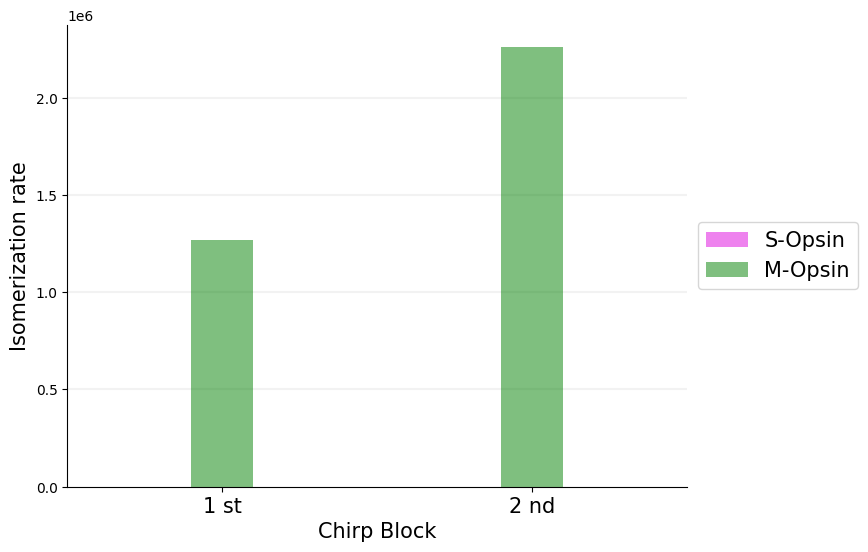

In [27]:
fontsize = 15
# bar plot
fig, ax = plt.subplots(figsize=(8, 6))
chirp_blocks_bar_plot(chirp_blocks_experiment1, ax, bar_width = 0.2, fontsize = fontsize ) 
ax.set_xbound(0.5, 2.5)


ax.set_ylabel('Isomerization rate', fontsize=fontsize)
ax.legend(['S-Opsin', 'M-Opsin'], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=fontsize)

for i in range(1, 5):
    color = 'k'
    linestyle = '-'
    alpha = 0.05
    zorder = 0
    ax.axhline(y=0.5*i*10**6, color=color, linestyle=linestyle, alpha=alpha, zorder=zorder)

# set x labels
ax.set_xticks(np.arange(1, len(chirp_blocks_experiment1) + 1))
ax.set_xticklabels(['1 st', '2 nd'], fontsize=fontsize)

# save the figure
fig.savefig('Experiment1_bar_plot.png', dpi=300, bbox_inches='tight')

print(ax.get_ybound())


In [28]:
chirp_blocks_experiment2_mod = {'Block_3': {'Color_1': {'s_c': 0.0, 'm_c': 1871699},
  'Color_2': {'s_c': 27687, 'm_c': 6322}},
 'Block_4': {'Color_1': {'s_c': 0.0, 'm_c': 1871699},
  'Color_2': {'s_c': 64387, 'm_c': 14701}}}

chirp_blocks_experiment3_mod = {'Block_4': {'Color_1': {'s_c': 0.0, 'm_c': 1871699},
  'Color_2': {'s_c': 64387, 'm_c': 14701}},
 'Block_3': {'Color_1': {'s_c': 0.0, 'm_c': 1871699},
  'Color_2': {'s_c': 27687, 'm_c': 6322}}}

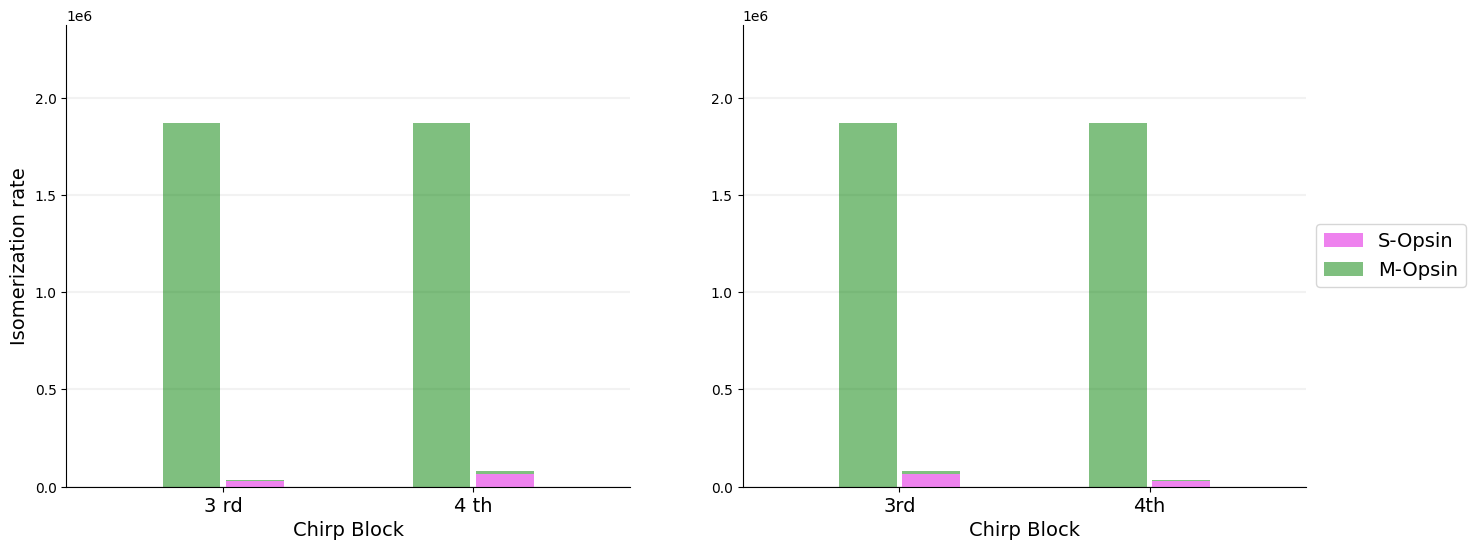

In [31]:
fontsize = 14

# bar plot
fig, ax = plt.subplots(figsize=(16, 6), nrows=1, ncols=2)
chirp_blocks_bar_plot(chirp_blocks_experiment2_mod, ax[0], bar_width = 0.23, fontsize = fontsize)
# set x labels
ax[0].set_xticklabels(['3 rd', '4 th'], fontsize=fontsize)

chirp_blocks_bar_plot(chirp_blocks_experiment3_mod, ax[1], bar_width = 0.23, fontsize = fontsize)
ax[1].set_xticklabels(['3rd' , '4th'], fontsize=fontsize)

ax[0].set_xbound(0.373, 2.6265)
ax[1].set_xbound(0.373, 2.6265)

ax[0].set_ylabel('Isomerization rate', fontsize=fontsize)
ax[1].legend(['S-Opsin', 'M-Opsin'], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=fontsize)

# set y man

ax[0].set_ybound(0, 2375100.0)
ax[1].set_ybound(0, 2375100.0)

for i in range(0, 2):
    color = 'k'
    linestyle = '-'
    alpha = 0.05
    zorder = 0
    for j in range(5):
        ax[i].axhline(y=0.5*j*10**6, color=color, linestyle=linestyle, alpha=alpha, zorder=zorder)

# save the figure
fig.savefig('Experiment2_3_bar_plot.png', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Calibration Experiment #3')

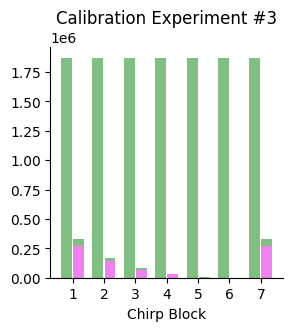

In [26]:
# bar plot
fig, ax = plt.subplots(figsize=(3, 3))
chirp_blocks_bar_plot(chirp_blocks_experiment3, ax)
ax.set_title('Calibration Experiment #3')

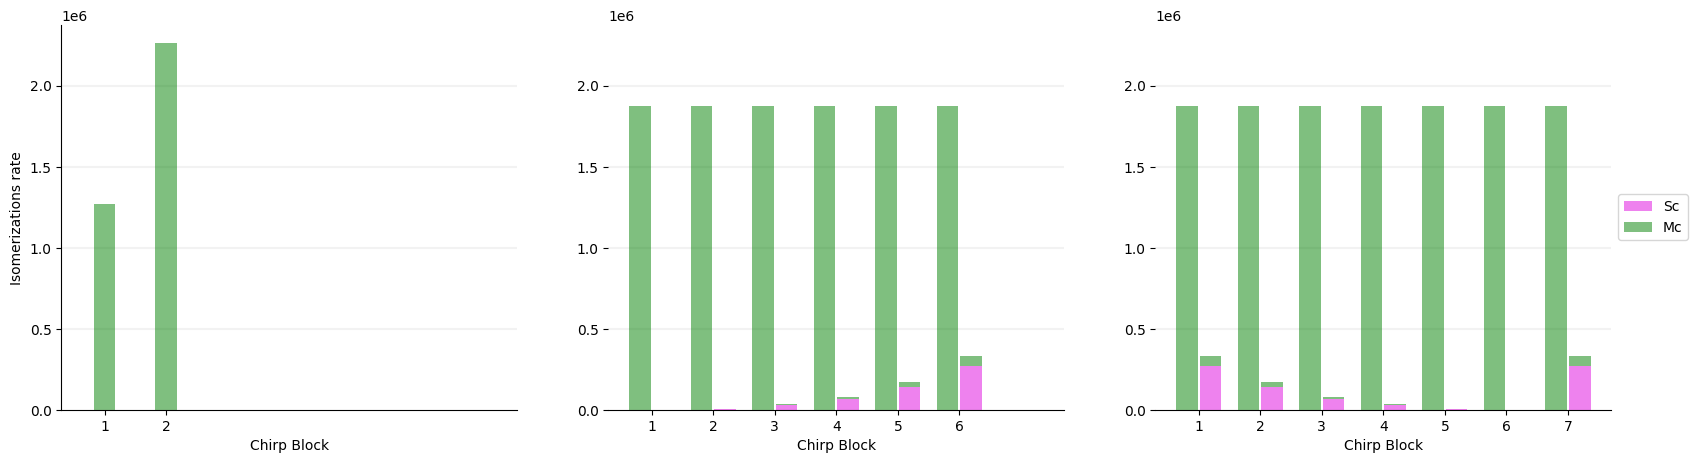

In [27]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20, 5))
ax[0].set_ylabel('Isomerization rate')
ax[0] = chirp_blocks_bar_plot(chirp_blocks_experiment1, ax[0])
ax[0].set_xlim([-1.5,4.5])

chirp_blocks_bar_plot(chirp_blocks_experiment2, ax[1])
chirp_blocks_bar_plot(chirp_blocks_experiment3, ax[2])
ax[2].legend(['Sc', 'Mc'], loc='center left', bbox_to_anchor=(1, 0.5))

y_lim = ax[0].get_ylim()
ax[1].set_ylim(y_lim)
ax[2].set_ylim(y_lim)

x_lim = ax[2].get_xlim()
ax[0].set_xlim(x_lim)
ax[1].set_xlim(x_lim)

ax[1].spines['left'].set_visible(False)
ax[2].spines['left'].set_visible(False)

# plot horizontal lines

for i in range(1, 4):
    color = 'k'
    linestyle = '-'
    alpha = 0.05
    zorder = 0
    ax[i-1].axhline(y=0.5*10**6, color=color, linestyle=linestyle, alpha=alpha, zorder=zorder)
    ax[i-1].axhline(y=1*10**6, color=color, linestyle=linestyle, alpha=alpha, zorder=zorder)
    ax[i-1].axhline(y=1.5*10**6, color=color, linestyle=linestyle, alpha=alpha, zorder=zorder)
    ax[i-1].axhline(y=2*10**6, color=color, linestyle=linestyle, alpha=alpha, zorder=zorder)


In [32]:
# save figure

fig.savefig('chirp_blocks_bar_plot.png', dpi=300, bbox_inches='tight')

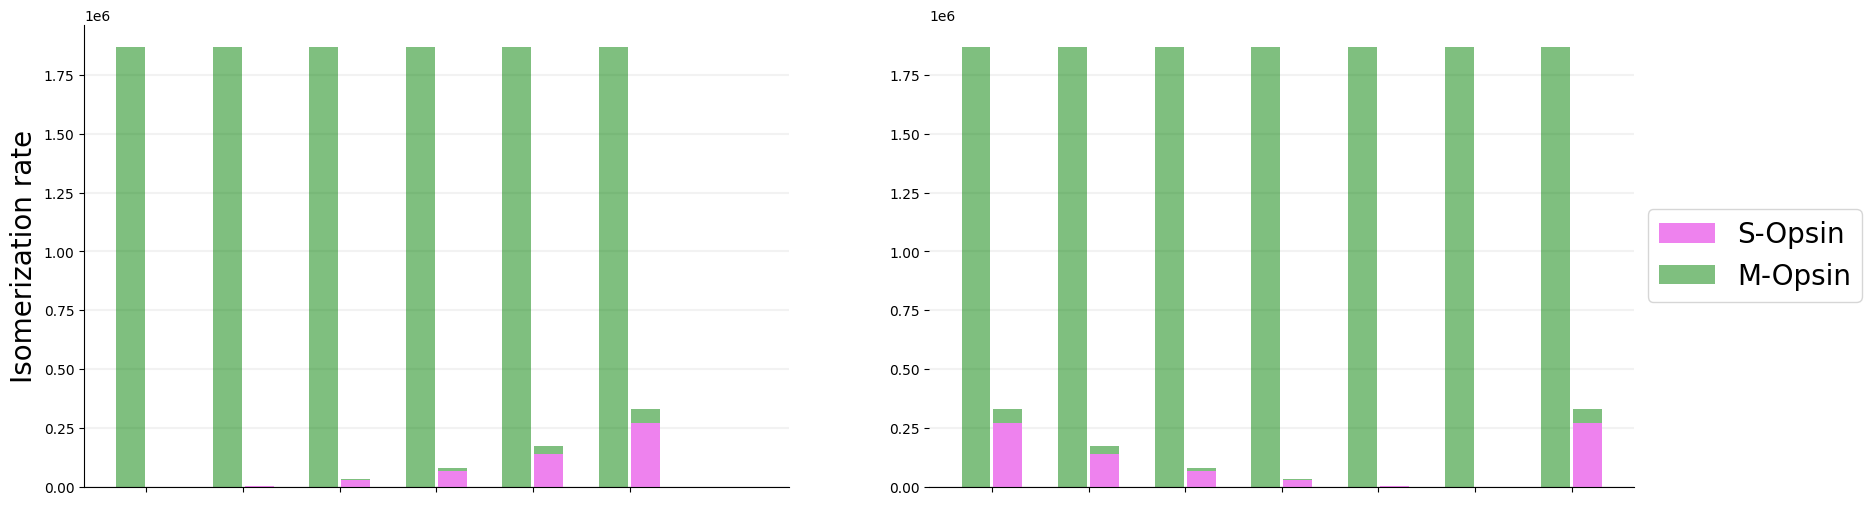

In [65]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20, 6))

fontsize = 20

ax[0].set_ylabel('Isomerization rate', fontsize=fontsize)
ax[0].set_xlim([-1.5,4.5])

chirp_blocks_bar_plot(chirp_blocks_experiment2, ax[0], fontsize=fontsize, bar_width = 0.3)
chirp_blocks_bar_plot(chirp_blocks_experiment3, ax[1], fontsize=fontsize, bar_width = 0.3)
ax[1].legend(['S-Opsin', 'M-Opsin'], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=fontsize)

y_lim = ax[0].get_ylim()
ax[0].set_ylim(y_lim)
ax[1].set_ylim(y_lim)

ax[0].set_xticklabels([])
ax[1].set_xticklabels([])

ax[0].set_xlabel('')
ax[1].set_xlabel('')

x_lim = ax[1].get_xlim()
ax[0].set_xlim(x_lim)
# ax[0].spines['left'].set_visible(False)
ax[1].spines['left'].set_visible(False)

# plot horizontal lines

for i in range(1, 3):
    color = 'k'
    linestyle = '-'
    alpha = 0.05
    zorder = 0
    for j in range(10):
        ax[i-1].axhline(y=0.25*j*10**6, color=color, linestyle=linestyle, alpha=alpha, zorder=zorder)

# save figure
fig.savefig('Cal_Exp_panoramic_2_and_3_bottom.png', dpi=300, bbox_inches='tight')


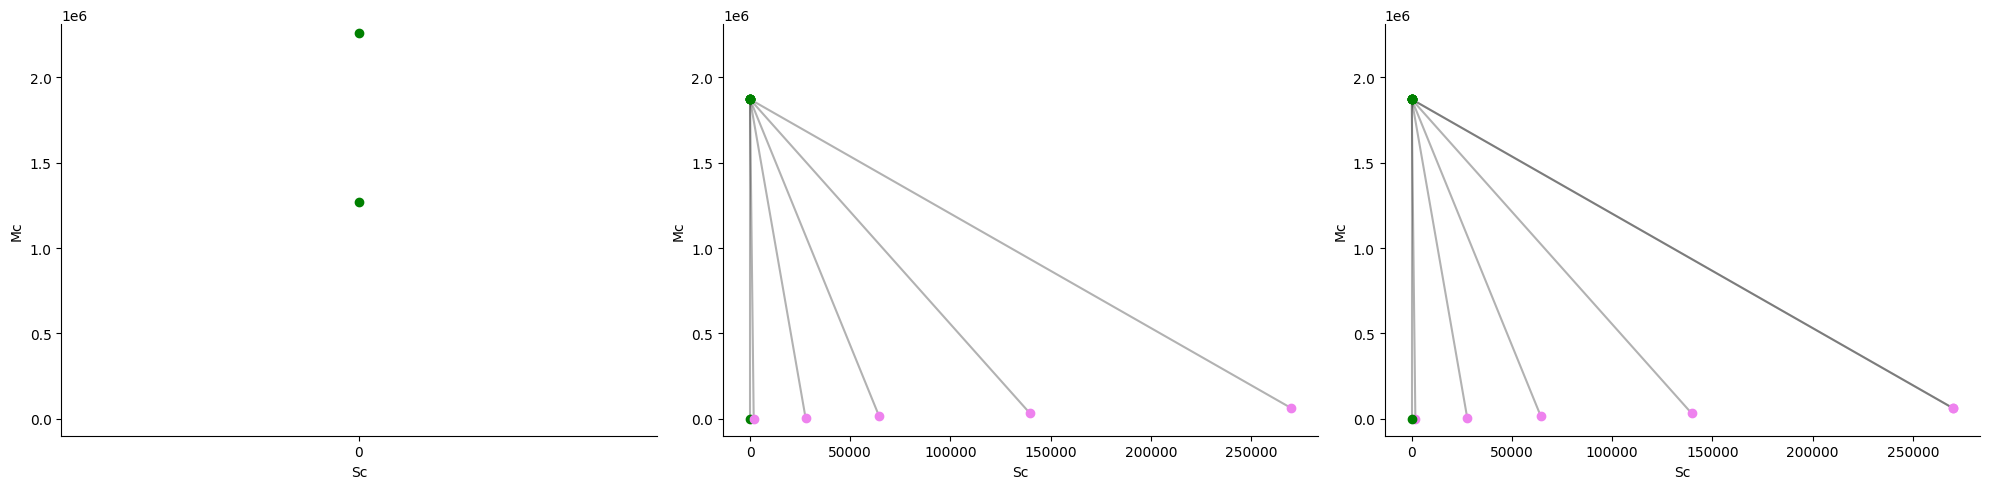

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

ax[0] = plot_chirp_blocks_2D_plane(chirp_blocks_experiment1, ax = ax[0], dot_color_setting = 'auto')
ax[1] = plot_chirp_blocks_2D_plane(chirp_blocks_experiment2, ax = ax[1], dot_color_setting = 'auto')
ax[2] = plot_chirp_blocks_2D_plane(chirp_blocks_experiment3, ax = ax[2], dot_color_setting = 'auto')

y_lim = ax[0].get_ylim()
ax[0].set_ylim([-100000, y_lim[1]])
ax[1].set_ylim([-100000, y_lim[1]])
ax[2].set_ylim([-100000, y_lim[1]])

ax[0].set_xticks([0])

plt.tight_layout()

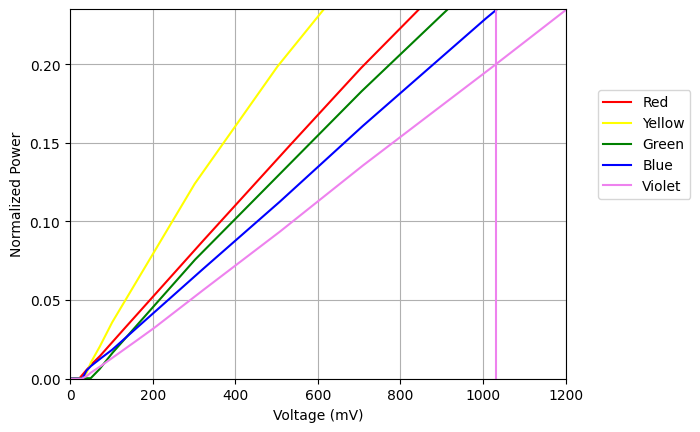

In [64]:
plot(newVcurves[0] / Rmax,color='red')
plot(newVcurves[1] / Ymax,color='yellow')
plot(newVcurves[2] / Gmax,color='green')
plot(newVcurves[3] / Bmax,color='blue')
plot(newVcurves[4] / Vmax,color='violet')
plt.legend(['Red','Yellow','Green','Blue','Violet'], bbox_to_anchor=(1.05, 0.8))
plt.xlabel('Voltage (mV)')
plt.ylabel('Normalized Power')

# TODO make this a function and in a for loop

if violet != 0:
    # plot vertical line at desired voltage
    axvline(x=find_V(violet,'v', newVcurves, Vnew)*1000,color='violet',linestyle='-')

if blue != 0:
    # plot vertical line at desired voltage
    axvline(x=find_V(blue,'b', newVcurves, Vnew)*1000,color='blue',linestyle='--')

if green != 0:
    # plot vertical line at desired voltage
    axvline(x=find_V(green,'g', newVcurves, Vnew)*1000,color='green',linestyle='--')

if yellow != 0:
    # plot vertical line at desired voltage
    axvline(x=find_V(yellow,'y', newVcurves, Vnew)*1000,color='yellow',linestyle='--')

if red != 0:
    # plot vertical line at desired voltage
    axvline(x=find_V(red,'r', newVcurves, Vnew)*1000,color='red',linestyle='--')

# zoom on the interesting part

xlim([0,1201])
ylim([0.0,0.2350])    

# grid on
grid()